In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

In [2]:
frontal = cv2.imread('frontal.jpg')
lateral = cv2.imread('lateral.jpg')

frontal = cv2.cvtColor(frontal,cv2.COLOR_BGR2GRAY)
lateral = cv2.cvtColor(lateral,cv2.COLOR_BGR2GRAY)

cv2.imwrite('Frontal_gray.jpg',frontal)
cv2.imwrite('Lateral_gray.jpg',lateral)

True

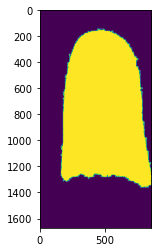

In [3]:
# Thresholding
F = np.zeros(frontal.shape)
idx1 = frontal[:,:]>0
F[idx1]=255
idx2 = frontal[:,:]==0
F[idx2]=0
plt.imshow(F.astype(np.uint8))

#cv2.imwrite('Frontal_gray_thresh.jpg',F.astype(np.uint8))

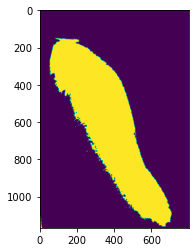

In [4]:
# Thresholding
T = np.zeros(lateral.shape)
id1 = lateral[:,:]>6
T[id1]=255
id2 = lateral[:,:]==0
T[id2]=0
plt.imshow(T.astype(np.uint8))

#cv2.imwrite('Lateral_gray_thresh.jpg',T.astype(np.uint8))

In [27]:
#Finding all the major axes with their rows
major_axis = []
initial_i=[]
for i in range(200,F.shape[0]):
    #print(i)
    for j in range(F.shape[1]-1):
        #print(F[i,j],F[i,j+1])
        if F[i,j]==0 and np.all(F[i,j+1:j+12]!=0): 
            initial_ind=j
            initial_i.append(j)
            #print(j)
        elif F[i,j]!=0 and np.all(F[i,j+1:j+12]==0): 
            #print(j)
            final_ind=j
    major_axis.append((i,int((final_ind-initial_ind)/2)))

In [28]:
#Finding all the minor axes with their rows
minor_axis = []

for i in range(200,T.shape[0]):
    for j in range(T.shape[1]-1):
        if T[i,j]==0 and np.all(T[i,j+1:j+12]!=0):
            initial_ind=j
           
        elif  T[i,j]!=0 and np.all(T[i,j+1:j+12]==0):
            final_ind=j
    minor_axis.append((i,int((final_ind-initial_ind)/2)))

In [29]:
major_axis = np.array(major_axis)
minor_axis = np.array(minor_axis)
print(major_axis.shape)
print(minor_axis.shape)
print(np.max(major_axis[:,1]))
print(np.min(minor_axis[:,1]))

(1472, 2)
(968, 2)
347
-323


In [30]:
def merge(list1, list2,list3):
	
	merged_list = tuple(zip(list1, list2,list3))
	return merged_list



In [35]:
#generating points for all ellipse
point_cloud=[]
#sum1=0
k = np.zeros(np.shape(frontal))
initial=np.array(initial)
for i in range(len(minor_axis)):
    y = np.arange(-major_axis[i][1],major_axis[i][1])#np.linspace(-major_axis[i][1],major_axis[i][1],2*major_axis[i][1])
    z = minor_axis[i][1]*np.sqrt((1-(y/(major_axis[i][1]+ np.finfo(float).eps))**2))
    x = np.ones(y.shape)*i
    y_pos = y + major_axis[i][1]
    #print(x.shape,y.shape,z.shape)
    #sum1 = sum1 + z.shape[0]
    #print(np.uint16(y))
    if initial[i]<500:
        k[158+i,initial_i[i]+np.uint32(y_pos)]=z
        point_cloud.extend(merge(x, y,z))
    #point_cloud.extend(merge(x, y,-z))
point_cloud = np.array(point_cloud)

In [40]:
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud)
o3d.io.write_point_cloud("./data2.ply", pcd)
savemat("points2.mat", mdict={"points":k})

True

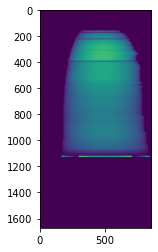

In [37]:
plt.imshow(k.astype(np.uint8))
cv2.imwrite('height_map.jpg',k.astype(np.uint8))

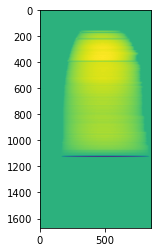

In [38]:

#points = (points - np.min(points)) / (np.max(points) - np.min(points)) * 255
#pointsUint8 = points.astype(np.uint8)

# plot result
plt.figure()
plt.imshow(k)
plt.imsave('image_new.jpg',k )

In [19]:
print(k.shape)

(1672, 856)
